# 📐 Vectors and Operations

**Theory:**
- Vectors, magnitude, direction
- Unit vectors, basis vectors
- Vector addition, scalar multiplication

**Practice:**
- Use NumPy for vector creation & operations
- Visualize vectors in 2D with Matplotlib
- Interactive sliders to explore linear combinations


In [78]:
# Minimum amount of libs to play with vectors:
import numpy as np
import matplotlib.pyplot as plt

# Measure the time two operations can take:
from datetime import datetime

# Pretty print:
from pprint import pprint

In [20]:
# Vectors, magnitude and direction:
v = np.array([1,2])

pprint({
    "type": type(v),
    "vector": v,
    "dimensions": np.ndim(v),
    "shape": v.shape,
})


{'dimensions': 1,
 'shape': (2,),
 'type': <class 'numpy.ndarray'>,
 'vector': array([1, 2])}


**CAVEAT** the _dimension_ of a vetor returns the number of axes of the array, whilst the _size_ of the array returns a _tuple (n,m)_, where _n_ is the number of _rows_ and _m_ the number of _columns_.

 ### **Definition:**

 The _L2 norm_, also known as the _Euclidian_ norm, is how we measure the magnitude of a vector!

 $\mathbf\|{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$

or equivalently

$\left( \sum_{i=1}^n x_i^2 \right)^{1/2}$


In [21]:
# The magnitude can be calculated:
magnitude = np.linalg.norm(v)
pprint({
    "magnitude": magnitude,
})

{'magnitude': np.float64(2.23606797749979)}


The direction gives us the orientation of a vector in space.

$\mathbf{\hat{x}} = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}$

Note that the function above gives us _another vector_. A special vector called normalize, or unit vector!



In [22]:
x_hat = v / magnitude
pprint({
    "direction": x_hat,
})

{'direction': array([0.4472136 , 0.89442719])}


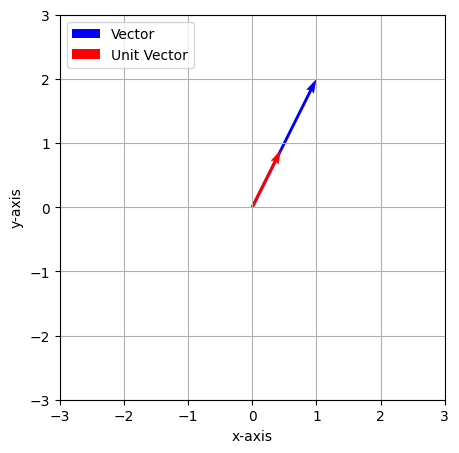

In [23]:
plt.figure(figsize=(5,5))
plt.grid()

# Plot the vetor:
plt.quiver(0, 0, v[0], v[1], color="blue", scale_units="xy", scale=1, angles='xy')

# Plot the unit vector
plt.quiver(0, 0, x_hat[0], x_hat[1], color="red", scale_units="xy", scale=1, angles='xy')

plt.xlim([-max(abs(v))-1, max(abs(v))+1]) # Adjust x-axis limits
plt.ylim([-max(abs(v))-1, max(abs(v))+1]) # Adjust y-axis limits

plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.legend(["Vector", "Unit Vector"], loc='upper left')

plt.gca().set_aspect('equal', adjustable='box') # Ensure equal aspect ratio
plt.show()

## Arithmetic

The arithmetic operators on arrays apply elementwise, which means that when you use operations like addition (+), subtraction (-), multiplication (*), or division (/) with arrays, the operation happens between the corresponding elements of the arrays.

Example:

If you have two arrays:

Array 1: `[1, 2, 3]` Array 2: `[4, 5, 6]`

And you add them together:

Result: `[1+4, 2+5, 3+6]` which is `[5, 7, 9]`



In [24]:
a = np.array([1, 2])
b = np.array([3, 4])

# Addition
result_add = a + b
print("Addition:", result_add)

# Subtraction
result_sub = a - b
print("Subtraction:", result_sub)

# Multiplication by a scalar and between vectors:
result_scalar_mul = 2 * a
print("Scalar multiplication:", result_scalar_mul)
result_mul = a * b
print("Multiplication:", result_mul)

# Division:
result_div = a / b
print("Division:", result_div)

Addition: [4 6]
Subtraction: [-2 -2]
Scalar multiplication: [2 4]
Multiplication: [3 8]
Division: [0.33333333 0.5       ]


### **Definition:**

The dot product or scalar product, is a mathematical operation that takes two vectors and returns a single number (a scalar). Different from our multiplication above, the dot product is a component wise operation.

Example:

$\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^n a_i b_i = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n$ \

Or equialently: \

$\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos(\theta)$

Where:

$\mathbf{a}$ and $\mathbf{b}$ are the vectors.
$a_i$ and $b_i$ are the components of the vectors.

$\|\mathbf{a}\|$ and $\|\mathbf{b}\|$ are the magnitudes (or lengths) of the vectors $\mathbf{a}$ and $\mathbf{b}$.

$\theta$ is the angle between the vectors $\mathbf{a}$ and $\mathbf{b}$.

In [25]:
result_dot = b.dot(a)
print("Dot product:", result_dot)

result_same = np.sum(a * b)
print("Dot product:", result_same)

result_new_symbol = a @ b
print("Dot product:", result_new_symbol)

Dot product: 11
Dot product: 11
Dot product: 11


In [75]:
# %%timeit
# c = np.array(range(0,1000))
# d = np.array(range(0,1000))
# result_time = c.dot(d)

192 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [81]:
c = np.array(range(0,1000))
d = np.array(range(0,1000))

t0 = datetime.now()
result_time = c.dot(d)
t1 = datetime.now()
print("Time taken:", (t1 - t0).total_seconds())

Time taken: 0.000103


In [76]:
# %%timeit
# c = np.array(range(0,1000))
# d = np.array(range(0,1000))
# e = 0
# for i in range(len(c)):
#   e += c[i] * d[i]

434 µs ± 9.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [82]:
c = np.array(range(0,1000))
d = np.array(range(0,1000))

t0 = datetime.now()
e = 0
for i in range(len(c)):
  e += c[i] * d[i]
t1 = datetime.now()
print("Time taken:", (t1 - t0).total_seconds())

Time taken: 0.001093
